# Starting off

1. What is regularization? 

2. What is the goal of implementing regularization (Ridge and Lasso) for a linear model?

## Regularized Logistic Regression

Similar to the linear regression, even logistic regression is prone to overfitting if there are large number of features.

So, the cost function of the logistic regression can be updated to penalize high values of the parameters and is given by,

$$J(\theta) = -{1 \over m} \sum_{i=1}^m \left( y^{(i)}\,log(h_\theta(x^{(i)}) + (1-y^{(i)})\,log(1 - h_\theta(x^{(i)})) \right) + {\lambda \over 2m } \sum_{j=1}^n \theta_j^2 \tag{1}$$

Where: 

- ${\lambda \over 2m } \sum_{j=1}^n \theta_j^2$ **is the regularization term**

- $\lambda$ is the **regularization factor**

Questions
1. Is the regularization term above Ridge or Lasso?
2. How would would you chnage the term to be the other variation of regularization?


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [4]:
# Read in data and split data to be used in the models
titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [5]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Scaling our data

**Don't Forget** that when utilizing regularization, you must scale your features so that scale of the features does not play a role in how the weights of the fetures are penalized. 

In [7]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [8]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [9]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

## Hyperparameter Tuning

For regularized logistic regression, we are looking to tune two paramters.

1. The type of regularization L2(ridge) or L1(Lasso)
2. The size of regularization factor/term

In [10]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [11]:

# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

In [15]:
# Fit grid search
model = clf_gs.fit(X_train_scaled, y_train)

/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:11

/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [16]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [17]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))


Training F1 Score: 0.7443762781186095
Testing F1 Score: 0.7738095238095238


Let's look at our most impactful coefficients

In [39]:
# Sort feature importances in descending order

model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params

[('male', -1.051695903935688),
 ('Pclass', -0.701495453010948),
 ('youngin', 0.40535887750673183),
 ('SibSp', -0.31786672006547206),
 ('S', -0.24236299332893146),
 ('Age', -0.22673337351782377),
 ('Fare', 0.1384976177546792),
 ('Parch', -0.10482955843420973),
 ('Q', -0.03927676632102545)]

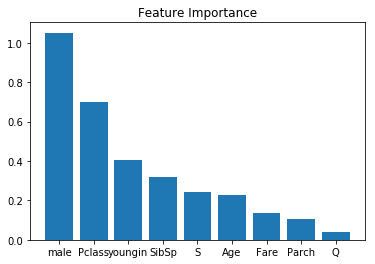

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Using Decision Trees for feature selection

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9841897233201581
Testing F1 Score: 0.7529411764705881


In [22]:
# Calculate feature importances
importances = clf.feature_importances_


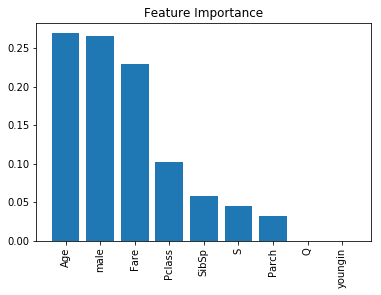

In [23]:
 
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

Why do you think the feature 'younging' so important in the Logistic Regression, but not in the Decision Tree?

## Using Pipelines

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


### Create a pipeline

In [27]:
pipe_lr_poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(random_state=42))])

### Create the dictionary of hyperparameters we want to test

In [28]:
penalty_param_range = [1.0, 0.5, 0.1, .01]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': penalty_param_range,
		'clf__solver': ['liblinear']}] 

### Use gridsearch with our pipeline to find best parameters

In [29]:
gs_lr_poly = GridSearchCV(estimator=pipe_lr_poly,
			param_grid=grid_params_lr,
			scoring='f1',
			cv=10)

### Fit the gridsearch object to the data

In [30]:
gs_lr_poly.fit(X_train, y_train)


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'clf__penalty': ['l1', 'l2'], 'clf__C': [1.0, 0.5, 0.1, 0.01], 'clf__solver': ['liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

### Identify the best performing models and see how it performs on the test set.

In [31]:
# Best params
print('Best params: %s' % gs_lr_poly.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr_poly.best_score_)
# Predict on test data with best params
y_pred = gs_lr_poly.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.743
Test set F1 score for best params: 0.778 


In [37]:
from sklearn.tree import DecisionTreeClassifier



In [38]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
tree_depth_range = list(range(1,20))
max_features_range = list(range(1,10))
grid_params_dt = [{'max_depth': tree_depth_range, 
                   'max_features': max_features_range}] 

In [46]:
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
			param_grid=grid_params_dt,
			scoring='f1',
			cv=5)

In [47]:
gs_dt.fit(X_train, y_train)


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
pipe_KNN_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
            ('scl', StandardScaler()),
            ('knn', KNeighborsClassifier())])

In [54]:

neighbors= list(range(1,20,2))
grid_params_KNN = [{'knn__n_neighbors':neighbors, 'knn__weights': ['uniform', 'distance']}] 



In [55]:
gs_KNN_poly = GridSearchCV(estimator=pipe_KNN_poly,
                           param_grid=grid_params_KNN,
                           scoring='f1',
                           cv=5)

In [56]:
gs_KNN_poly.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'knn__weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [57]:
gs_KNN_poly.fit(X_train, y_train)
# Best params
print('Best params: %s' % gs_KNN_poly.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr_poly.best_score_)
# Predict on test data with best params
y_pred = gs_KNN_poly.predict(X_test)
# Test data accuracy of model with best params
print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))

Best params: {'knn__n_neighbors': 17, 'knn__weights': 'uniform'}
Best training accuracy: 0.743
Test set F1 score for best params: 0.742 


### Put all of our grid search objects in a list so that we can loop over all of them.

In [58]:
# List of pipelines for ease of iteration
grids = [gs_lr_poly, gs_dt, gs_KNN_poly]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 
		2: 'KNN'}


### A script that loops over all of the grid search objects and identifies the best one. 

In [59]:
# Fit the grid search objects
print('Performing model optimizations...')
best_f1 = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training F1: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
	# Test data accuracy of model with best params
	print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))
	# Track best (highest test accuracy) model
	if f1_score(y_test, y_pred) > best_f1:
		best_f1 = f1_score(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set F1: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'pred

Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training F1: 0.743
Test set F1 score for best params: 0.778 

Estimator: Decision Tree


/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/swilson5/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params: {'max_depth': 5, 'max_features': 8}
Best training F1: 0.716
Test set F1 score for best params: 0.720 

Estimator: KNN
Best params: {'knn__n_neighbors': 17, 'knn__weights': 'uniform'}
Best training F1: 0.728
Test set F1 score for best params: 0.742 

Classifier with best test set F1: Logistic Regression
